In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Reading Data Set**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Ecommerce Purchases.csv")


# **Viewing First 10 Rows**

In [10]:
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


# **Checking Data types of Coloumns**

In [11]:
df.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

# **Checking Number of Rows and Coloumns**

In [16]:
df.shape

(10000, 14)

# **Checking Null Values**

In [12]:
df.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

# **Checking Duplicated Rows**

In [18]:
df.duplicated().sum()

0

# **Getting General information about Price Coloumn**

In [24]:
df["Purchase Price"].describe()

count    10000.000000
mean        50.347302
std         29.015836
min          0.000000
25%         25.150000
50%         50.505000
75%         75.770000
max         99.990000
Name: Purchase Price, dtype: float64

# **How many languages Customers Speak?**

In [32]:
len(df["Language"].unique())

9

In [40]:
x=df['Language'].value_counts()
print(x)

de    1155
ru    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Name: Language, dtype: int64


In [46]:
print(x.keys())

Index(['de', 'ru', 'el', 'pt', 'en', 'fr', 'es', 'it', 'zh'], dtype='object')


# **Pie chart of Laguages used**

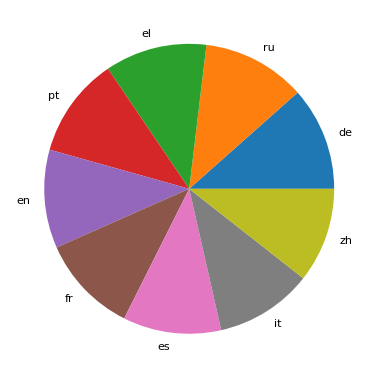

In [49]:
plt.figure(figsize=(8,6),dpi=80)
plt.pie(x,labels=x.keys())
plt.show()

# **Number of customers working as engineer**

In [54]:
df[df['Job'].str.contains('engineer',case=False)]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
50,"41159 Michael Centers\nAdamsfort, RI 37108-6674",46 Ce,PM,Mozilla/5.0 (Windows 98; Win 9x 4.90; sl-SI; r...,"Wright, Williams and Mendez",4008586485908075,05/19,945,JCB 16 digit,susanvalentine@obrien.org,Mechanical engineer,213.203.143.215,de,36.85
103,"480 Ronald Cape\nJohnville, MA 53644",11 wg,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5...,Brown Inc,30276609779632,03/22,676,Discover,wtownsend@jackson-johnson.biz,Technical sales engineer,119.178.136.56,it,51.37
193,1010 Mahoney Mills Suite 486\nWest Daniellevie...,70 Fd,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...,Wilson-Dennis,30359256148796,02/22,62,JCB 16 digit,stacy72@cruz.com,Energy engineer,189.183.41.220,pt,96.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,"52276 Smith Cliffs\nLake Vanessaview, AL 91791",40 nG,AM,Opera/9.62.(Windows NT 5.0; sl-SI) Presto/2.9....,Clay LLC,5148775191773208,05/23,583,VISA 16 digit,popejames@yahoo.com,Consulting civil engineer,130.63.250.128,el,99.75
9948,"95544 Johnson Isle Suite 939\nMichaelberg, RI ...",91 bW,AM,Opera/8.36.(X11; Linux x86_64; sl-SI) Presto/2...,Fox-Peterson,4762924304307,03/17,567,Mastercard,haleybenjamin@gmail.com,Structural engineer,120.36.140.58,en,71.89
9970,"0060 Keith Stream\nWestport, CO 47097",11 nt,PM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,"Carpenter, Good and Hart",6011485664704662,07/19,543,Discover,rangelbrian@hotmail.com,Electrical engineer,242.8.85.205,en,17.76
9977,"02182 Keith Expressway\nEast Shannon, CT 20578...",34 RL,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Deleon, Jacobson and Benton",4186094003664688,06/21,397,JCB 16 digit,daltoncarter@yahoo.com,Biomedical engineer,146.238.118.2,fr,94.93


# **Is website most used at night or day?**

In [61]:
print("{} is higher than {}".format(df["AM or PM"].value_counts().keys()[0],df["AM or PM"].value_counts().keys()[1]))

PM is higher than AM


# **Most used credit card Provider?**

In [64]:
print("Most used credit card provider is {}".format(df["CC Provider"].value_counts().keys()[0]))

Most used credit card provider is JCB 16 digit


# **Number of credit cards expired ?**

In [73]:
len(df[df["CC Exp Date"].apply(lambda x:x[3:]<'21')])

4309

# **Most used Email Provider ?**

In [82]:
list1=[]
def email_split():
  for i in df['Email']:
    list1.append(i.split("@")[1])
  return list1
email_split()
list2=[]
for j in list1:
  list2.append(j.split(".")[0])


In [83]:
df["Email_Provider"] = list2

In [84]:
df.head(1)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Email_Provider
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo


In [90]:
df['Email_Provider'].value_counts()

hotmail          1638
yahoo            1616
gmail            1605
smith              69
williams           55
                 ... 
williams-levy       1
cook-coffey         1
west-thomas         1
orozco-nunez        1
olson-russell       1
Name: Email_Provider, Length: 2575, dtype: int64

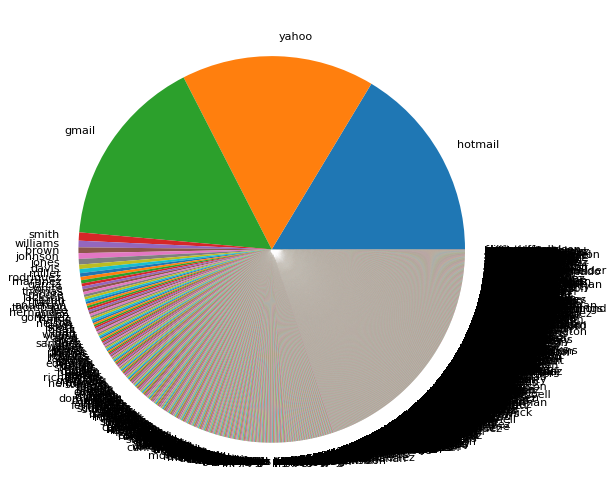

In [91]:
plt.figure(figsize=(10,8),dpi=80)
plt.pie(df['Email_Provider'].value_counts(),labels=df['Email_Provider'].value_counts().keys())
plt.show()